In [1]:

%load_ext autoreload
%autoreload 2

import tyssue

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

import tyssue as ty

from tyssue.core.sheet import Sheet
from tyssue.core.generation import three_faces_sheet
from tyssue.geometry.sheet_geometry import SheetGeometry  as geom
from tyssue.draw.mpl_draw import sheet_view
from tyssue.config import load_default

/home/guillaume/anaconda/envs/tyssue/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
%pdb

Automatic pdb calling has been turned ON


In [3]:

datasets, specs = three_faces_sheet()
sheet = Sheet('3cells_2D', datasets, specs)


geom.update_all(sheet)

In [4]:
sheet.jv_df.describe().head(3)

,z,is_active,y,basal_shift,x,rho,height
count,13,13,1.300000e+01,13,13.000000,13.000000,13.000000
mean,0,1,-8.540177e-18,4,0.000000,1.491694,-2.508306
std,0,0,1.172570e+00,0,1.172604,0.582529,0.582529


## Matplotlib based representation

### Custom settings

These might go in a config file latter on.

#### Ploting itself

## Epithelial sheet representation


### The  default

In [5]:
draw_specs = load_default('draw', 'sheet')

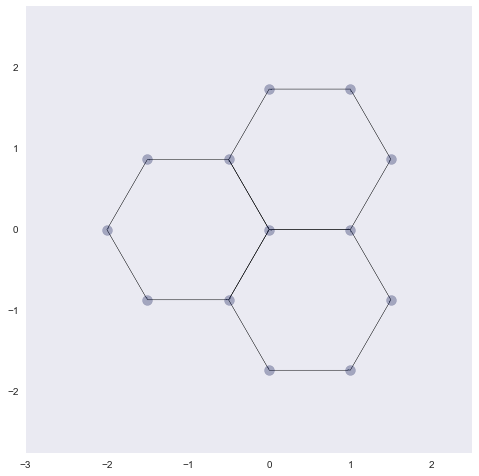

In [6]:
fig, ax = sheet_view(sheet, ['x', 'y'])


ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))
    


#### Coloring

In [7]:

## Let's add a column to sheet.jv_df
sheet.jv_df['rand'] = np.linspace(0.0, 1.0, 
                                  num=sheet.jv_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
color_cmap = cmap(sheet.jv_df.rand)

draw_specs['jv']['color'] = color_cmap
draw_specs['jv']['alpha'] = 0.5
draw_specs['jv']['s'] = 500

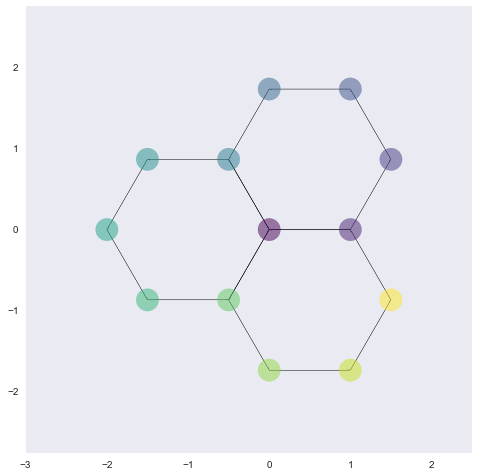

In [8]:
coords = ['x', 'y']
fig, ax = sheet_view(sheet, coords, **draw_specs)

ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))

#### Filling the cells



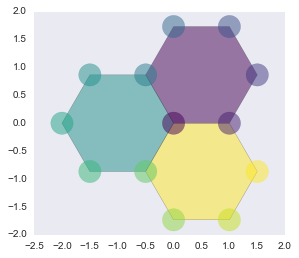

In [9]:
sheet.face_df['col'] = np.linspace(0.0, 1.0, 
                                    num=sheet.face_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
color_cmap = cmap(sheet.face_df.col)

draw_specs['je']['visible'] = False

draw_specs['face']['visible'] = True
draw_specs['face']['color'] = color_cmap
draw_specs['face']['alpha'] = 0.5


fig, ax = sheet_view(sheet, coords, **draw_specs)

### Vispy based


In [11]:
from tyssue.draw.vispy_draw import draw_tyssue

In [12]:
draw_specs['je']['visible'] = True

draw_specs['face']['visible'] = False
draw_specs['face']['color'] = color_cmap
draw_specs['face']['alpha'] = 0.5

edge_color = np.linspace(0.0, 1.0, 
                        num=sheet.je_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
edge_cmap = cmap(edge_color)
#draw_specs['je']['color'] = edge_cmap #[0, 0, 0, 1]
draw_specs['je']['color'] = [0, 0, 0, 1]

draw_specs['je']['width'] = 2.

In [14]:
np.asarray(draw_specs['je']['color']).shape

(4,)

In [13]:
draw_tyssue(sheet, **draw_specs)

/home/guillaume/anaconda/envs/tyssue/lib/python3.4/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
  File "/home/guillaume/anaconda/envs/tyssue/lib/python3.4/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/guillaume/anaconda/envs/tyssue/lib/python3.4/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/guillaume/anaconda/envs/tyssue/lib/python3.4/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/guillaume/anaconda/envs/tyssue/lib/python3.4/site-packages/traitlets/config/application.py", line 592, in launch_instance
    app.start()
  File "/home/guillaume/anaconda/envs/tyssue/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 389, in start
    ioloop.IOLoop.instance().start()
  File "/home/guillaume/anaconda